# Random Forest - Previsão de Séries Temporais

## Importar as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar a base de dados

In [2]:
dataset = pd.read_csv('fatvarejo.csv', sep=';')
dataset.head()

,MS,ANO,FAT
0,Jan,2003,4899
1,Fev,2003,4734
2,Mar,2003,4759
3,Abr,2003,4874
4,Mai,2003,5721


In [3]:
dataset["data"] = dataset["MS"] + dataset["ANO"].astype(str)
dataset.head()

,MS,ANO,FAT,data
0,Jan,2003,4899,Jan2003
1,Fev,2003,4734,Fev2003
2,Mar,2003,4759,Mar2003
3,Abr,2003,4874,Abr2003
4,Mai,2003,5721,Mai2003


In [4]:
dataset.index = dataset['data']
dataset = dataset.drop(columns=['ANO', 'MS', 'data'])
dataset.head()

,FAT
data,
Jan2003,4899
Fev2003,4734
Mar2003,4759
Abr2003,4874
Mai2003,5721


In [5]:
dataset.shape

(132, 1)

## Visualizar série histórica

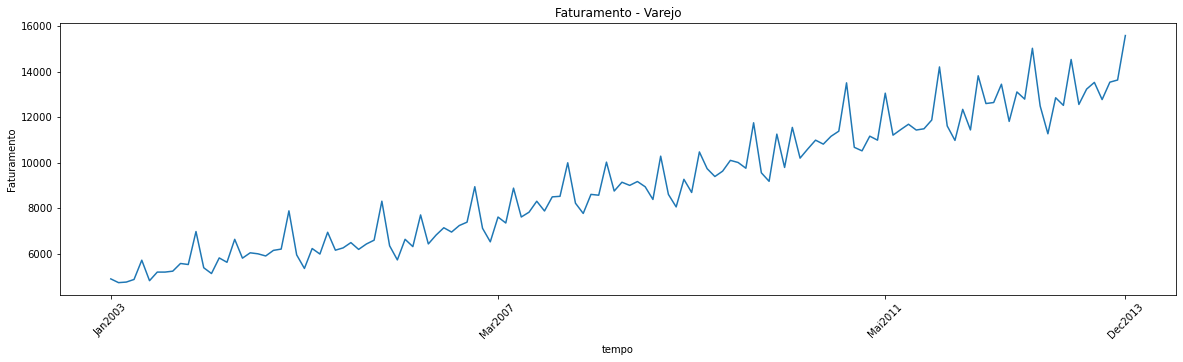

In [6]:
plt.figure(figsize=(20,5))
plt.plot(dataset)
plt.xlabel("tempo")
plt.ylabel("Faturamento")
plt.title("Faturamento - Varejo")
plt.xticks([0,50,100,131], rotation=45) # coloca somente 4 valores no eixo x e rotaciona 45 graus por questões de visualização
plt.show()

## Criar janelamento

In [7]:
window = 12
dataSize = len(dataset)
X = []
y = []
for i in range(window, dataSize):
    X.append(dataset.iloc[i-window:i, 0])
    y.append(dataset.iloc[i, 0])
X, y = np.array(X), np.array(y)

In [8]:
print(X.shape)
print(y.shape)

(120, 12)
(120,)


In [9]:
X[0:5]

array([[4899, 4734, 4759, 4874, 5721, 4820, 5198, 5198, 5239, 5577, 5531,
        6981],
       [4734, 4759, 4874, 5721, 4820, 5198, 5198, 5239, 5577, 5531, 6981,
        5389],
       [4759, 4874, 5721, 4820, 5198, 5198, 5239, 5577, 5531, 6981, 5389,
        5135],
       [4874, 5721, 4820, 5198, 5198, 5239, 5577, 5531, 6981, 5389, 5135,
        5821],
       [5721, 4820, 5198, 5198, 5239, 5577, 5531, 6981, 5389, 5135, 5821,
        5629]])

In [10]:
y[0:5]

array([5389, 5135, 5821, 5629, 6639])

## Separar em treino e teste

In [11]:
import random
np.random.seed(0) #semente inicial (reprodução de resultados)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# imprimir
x_train[0:5]

array([[12355, 11450, 13830, 12610, 12655, 13460, 11825, 13120, 12805,
        15040, 12505, 11280],
       [ 5135,  5821,  5629,  6639,  5811,  6046,  6002,  5907,  6153,
         6210,  7891,  5954],
       [ 7831,  8314,  7885,  8506,  8530, 10005,  8227,  7777,  8615,
         8579, 10033,  8762],
       [11170, 11395, 13520, 10685, 10530, 11175, 11000, 13066, 11220,
        11465, 11700, 11445],
       [ 6234,  5992,  6949,  6161,  6263,  6495,  6196,  6433,  6602,
         8316,  6355,  5734]])

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(96, 12)
(96,)
(24, 12)
(24,)


## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train);

## Utilizar modelo treinado para fazer previsões na base de teste (um passo à frente)

In [16]:
y_pred = regressor.predict(x_test)
y_pred[0:5]

array([ 8186.83377973, 12129.95463379, 14305.09461214,  5828.3271617 ,
       11518.43365018])

## Calcular métricas de erro

Resultados de Teste
RMSE:  421.9184592418535
MSE:  178015.18624901958
MAPE:  3.5654120439232875 %
R2:  0.9757936996535391


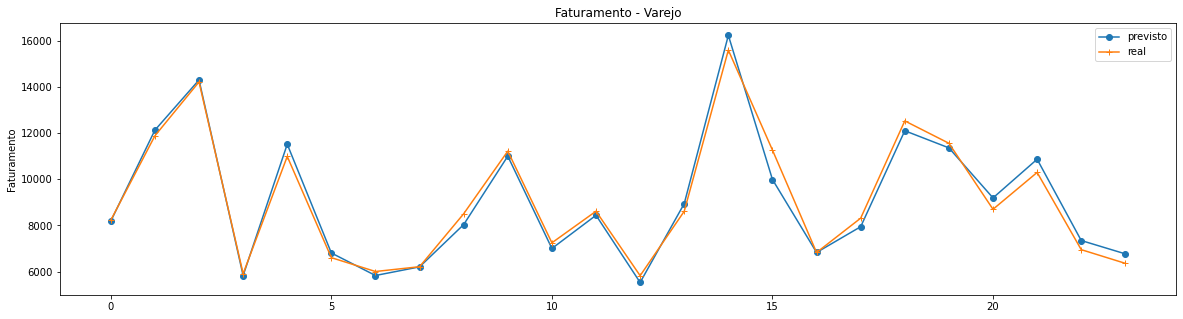

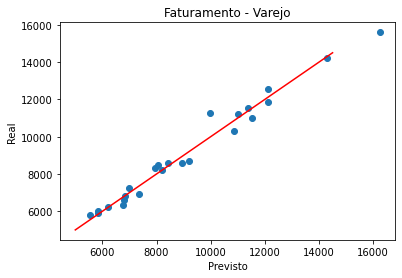

In [17]:
def evaluate(y_test, y_pred):
  import math
  from sklearn.metrics import mean_squared_error
  rmse = math.sqrt(mean_squared_error(y_test, y_pred))
  print('RMSE: ', rmse)

  mse = mean_squared_error(y_test, y_pred)
  print('MSE: ',mse)

  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  print('MAPE: ',mape, '%')

  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)

  # Gráfico 1
  plt.figure(figsize=(20,5))
  plt.plot(y_pred, label='previsto', marker='o')
  plt.plot(y_test, label='real', marker='+')
  plt.ylabel("Faturamento")
  plt.title("Faturamento - Varejo")
  plt.legend()
  plt.show()

  # Gráfico 2
  plt.scatter(y_pred,y_test)
  plt.ylabel("Real")
  plt.xlabel("Previsto")
  plt.title("Faturamento - Varejo")

  x = [5000.0, 14500.0]
  plt.plot(x, x, color='red'); # reta onde y=x (modelo perfeito)

  plt.show()

print('Resultados de Teste')
evaluate(y_test, y_pred)

## Avaliar Treino

RMSE:  339.0994219825269
MSE:  114988.41798888384
MAPE:  3.0014604494442616 %
R2:  0.9828332316481476


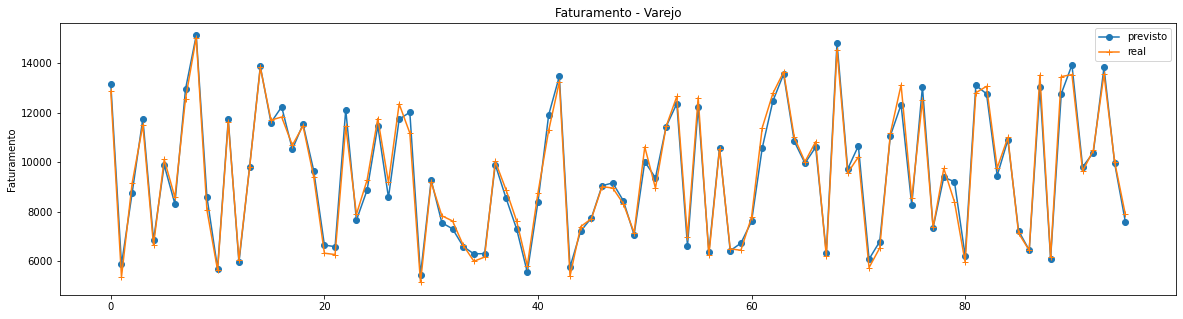

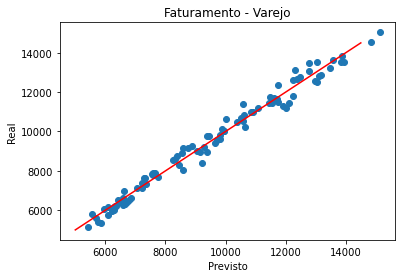

In [18]:
y_pred_train = regressor.predict(x_train)
evaluate(y_train, y_pred_train)

## Prever mais passos à frente

OBS: tenha em conta que o modelo é 'one step ahead'. Ao prever mais passos à frente utilizando a própria previsão, estaremos propagando cada vez mais erro!

### Exercício 1: Utilize o modelo treinado para fazer a previsão de 1 passo à frente

In [19]:
lag = dataset.iloc[dataSize-window:dataSize,0].values
lag[0:window]

array([12505, 11280, 12865, 12530, 14548, 12570, 13245, 13540, 12785,
       13550, 13645, 15600])

In [20]:
dataset.tail(window)

,FAT
data,
Jan2013,12505
Fev2013,11280
Mar2013,12865
Abr2013,12530
Mai2013,14548
Jun2013,12570
Jul2013,13245
Ago2013,13540
Set2013,12785


In [21]:
lag = lag.reshape(1, -1)
print(lag.shape)
lag

(1, 12)


array([[12505, 11280, 12865, 12530, 14548, 12570, 13245, 13540, 12785,
        13550, 13645, 15600]])

In [22]:
regressor.predict(lag)

array([13489.36813652])

### Exercício 2: Utilize o modelo treinado para fazer a previsão de 12 passos à frente

In [23]:
timesteps_to_predict = 12
lag = dataset.iloc[dataSize-window:dataSize,0].values
lag = lag.reshape(1, -1)

predictions=[]
for i in range(timesteps_to_predict):
  prediction = regressor.predict(lag)
  predictions.append(prediction)

  lag = lag[0, 1:window]  
  lag = np.append(lag, prediction[0])
  lag = lag.reshape(1, -1)

In [24]:
predictions

[array([13489.36813652]),
 array([12606.35978504]),
 array([13583.06125383]),
 array([13667.98664267]),
 array([15542.19103041]),
 array([13559.74615085]),
 array([14183.25173002]),
 array([14391.82557664]),
 array([13568.37354988]),
 array([14374.76330164]),
 array([14472.81927906]),
 array([16686.77453968])]

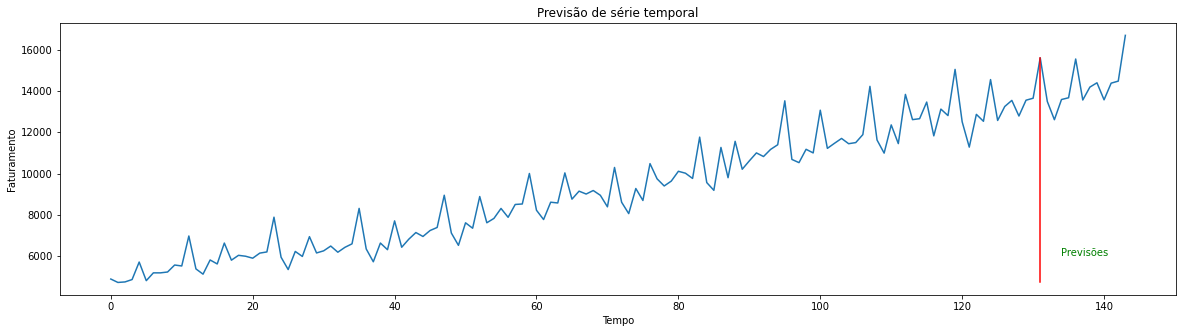

In [25]:
plt.figure(figsize=(20,5))
all_data = np.vstack((dataset, predictions))
plt.plot(all_data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Faturamento')

# marca o início das previsões
x = [len(dataset)-1, len(dataset)-1]
y = [dataset['FAT'].min(), dataset['FAT'].max()]
plt.plot(x, y, color='red')
plt.annotate("Previsões", (134, 6000), color='green')

#salva a figura
plt.savefig('predictions_training_test.svg')
plt.show()